# Setup

In [47]:
import numpy as np
import pandas as pd
import sklearn
import os

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_curve,
    auc
)

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import the data

We import all the datasets as needed.

In [50]:
X_train = pd.read_csv("x_train_all.csv")
X_test = pd.read_csv("x_test_all.csv")
y_train = pd.read_csv("y_train_all.csv")
y_test = pd.read_csv("y_test_all.csv")

# Dataset Information
This method prints information about a dataframe including the dtype and columns, non-null values and memory usage.

In [51]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB
None


# Count of each category instance in the training dataset

In [52]:
a = y_train.value_counts()
a

0
2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
dtype: int64

<Axes: ylabel='0'>

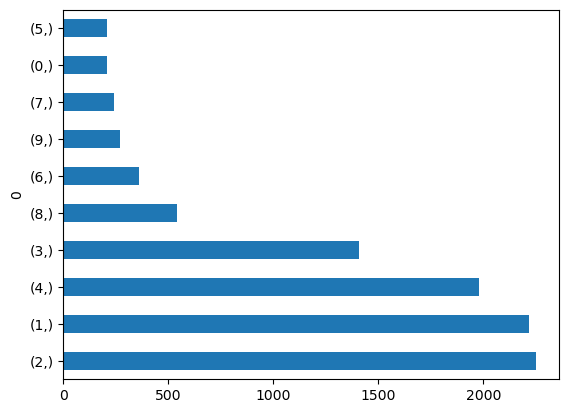

In [53]:
a.plot(kind='barh')

# Dataset Description

This method shows a statistical summary of the numerical attributes

In [54]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


# Missing values

In [55]:
X_train.isnull().values.any() or X_train.isna().values.any() #missing values check

False

We see that there are neither any null values or NaN values, hence requiring no dataset cleanup

# Pictorial representation of each category

We plot each of the traffic signs from the training data set by takeing 10 different records belonging to differenct classess from the training and displaying the corresponding image.

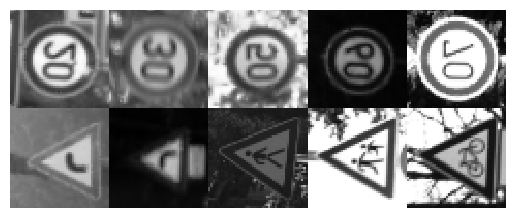

In [56]:
from matplotlib import cm

def plot_images(instances, images_per_row=5, **options):
    size = 48
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size).T for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, interpolation='nearest', cmap=cm.Greys_r, **options)
    plt.axis("off")
    
arr = X_train.to_numpy();  
example_images = [arr[16],arr[273], arr[2510], arr[5088], arr[6175],  arr[8118], arr[8312], arr[8662], arr[8962],  arr[9565]]
plot_images(example_images, images_per_row=5)

# Showing data in a table

We show the imported data in a table.

In [57]:
df = pd.DataFrame(X_train, columns=X_train.columns)
df

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,35.0,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,37.0,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,41.0,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,38.0,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0


# Build a Gaussian Classifier

We use a Gaussian Naive Bayes model to classify the data


In [58]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model_orig = GaussianNB()

# Train the Model

This will be done by passing the training set to the classifier. Since we are dealing with 10 classes, this becomes a multiclass classification problem.

In [59]:
y_train = y_train.values.ravel() #to convert to 1Darray

# Model training
model_orig.fit(X_train, y_train)

GaussianNB()

# Test the Model

In [60]:
# Model testing
y_pred = model_orig.predict(X_test)
#  returns the probabilities associated with each class
pred_prob =  model_orig.predict_proba(X_test)

The shape of pred_prob is (3090,10). 10 indicates that we have 10 classes

In [61]:
pred_prob.shape

(3090, 10)

In [62]:
y_pred.shape

(3090,)

In [63]:
y_test.shape

(3090, 1)

We will convert y_test to a 1D array to keep the same shape for y_pred and y_test. y_pred is the array of predicted values and y_test is the array of actual values

In [64]:
y_test = y_test.values.ravel() # ravel() returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)

Now, as you can see below, the shape of y_test and y_pred are the same.

In [65]:
y_test.shape

(3090,)

In [66]:
y_pred.shape

(3090,)

In [93]:
labels = [0,1,2,3,4,5,6,7,8,9]
label_names = ['0','1','2','3','4','5','6','7','8','9']

# Functions

In [94]:
def plot_confusion_matrix(matrix,labels=labels):
    disp_plot = ConfusionMatrixDisplay(matrix, display_labels=labels)
    disp_plot.plot();

In [95]:
def overall_model_eval(actual,pred):
    accuracy = accuracy_score(actual, pred)
    f1 = f1_score(actual, pred, average="weighted")
    precision = precision_score(actual, pred,  average="weighted")
    recall = recall_score(actual, pred,  average="weighted")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    return accuracy, f1, precision, recall
    

In [96]:
def each_cat_eval(conf_matrix):
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TP = np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + TP)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    d = {'Recall': TPR, 'TNR': TNR, 'Precision':PPV, 'NPV': NPV, 'FPR':FPR, 'FNR':FNR,'FDR':FDR, 'ACC':ACC}
    df = pd.DataFrame(data=d)
    print("Against each category\n", df)

    
    return TPR, TNR, PPV, NPV, FPR, FNR, FDR, ACC

In [97]:
def cross_validation_kfold(model_arg,train_inp,train_out):
    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    y_scores = cross_val_score(model_arg, train_inp, train_out, cv=k_fold, n_jobs=1)
    print(y_scores)

In [98]:
from sklearn.preprocessing import label_binarize

def plot_roc_curves(actual, pred_prob_arg, classes=labels):
    y_test_binarized = label_binarize(actual, classes=classes)
    
    fpr = {}
    tpr = {}
    thresh = {}
    roc_auc = dict()
    
    for i in range(len(classes)):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:, i], pred_prob_arg[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], linestyle='--', label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
    
    
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()




# Confusion Matrix

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. In an ideal scenario, the classifier would only have true positives and true negatives. So every value except the main diagonal (top left to bottom right) would be zero.
Here however in the actual representation we see that this model is far from being perfect.

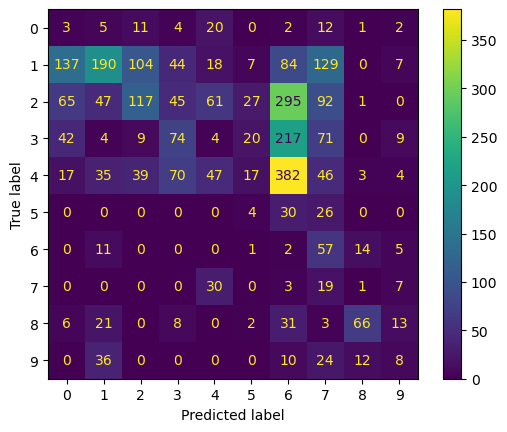

In [99]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred, labels=labels)
plot_confusion_matrix(confusion_matrix_1);

# Evaluation of the model

In [100]:
accuracy_orig,f1_orig,precision_orig,recall_orig = overall_model_eval(y_test, y_pred)

Accuracy: 0.1715210355987055
F1 Score: 0.22488545869568077
Precision: 0.36699901455553113
Recall: 0.1715210355987055


# Evaluating the metrics against each category: 

In [101]:
TPR_1, TNR_1, PPV_1, NPV_1, FPR_1, FNR_1, FDR_1, ACC_1 = each_cat_eval(confusion_matrix_1)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.050000  0.911881   0.011111  0.979787  0.088119  0.950000  0.988889   
1  0.263889  0.932911   0.544413  0.806640  0.067089  0.736111  0.455587   
2  0.156000  0.930342   0.417857  0.774733  0.069658  0.844000  0.582143   
3  0.164444  0.935227   0.302041  0.867838  0.064773  0.835556  0.697959   
4  0.071212  0.945267   0.261111  0.789347  0.054733  0.928788  0.738889   
5  0.066667  0.975578   0.051282  0.981408  0.024422  0.933333  0.948718   
6  0.022222  0.648667   0.001894  0.956735  0.351333  0.977778  0.998106   
7  0.316667  0.848185   0.039666  0.984297  0.151815  0.683333  0.960334   
8  0.440000  0.989116   0.673469  0.971925  0.010884  0.560000  0.326531   
9  0.088889  0.984333   0.145455  0.972982  0.015667  0.911111  0.854545   

        ACC  
0  0.895146  
1  0.777023  
2  0.742395  
3  0.822977  
4  0.758576  
5  0.957929  
6  0.630421  
7  0.837864  
8  0.962460  


In [102]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.01      0.05      0.02        60
           1       0.54      0.26      0.36       720
           2       0.42      0.16      0.23       750
           3       0.30      0.16      0.21       450
           4       0.26      0.07      0.11       660
           5       0.05      0.07      0.06        60
           6       0.00      0.02      0.00        90
           7       0.04      0.32      0.07        60
           8       0.67      0.44      0.53       150
           9       0.15      0.09      0.11        90

    accuracy                           0.17      3090
   macro avg       0.24      0.16      0.17      3090
weighted avg       0.37      0.17      0.22      3090



# Cross Validation using k-fold

That k-fold cross validation is a procedure used to estimate the skill of the model on new data. K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time. Here we divide the data into 10 folds. Hence the length of y_scores array is 10.

In [103]:
cross_validation_kfold(model_orig,X_train,y_train)

[0.21981424 0.2249742  0.23323013 0.24561404 0.21981424 0.22600619
 0.22600619 0.22807018 0.23942208 0.22600619]


# ROC Curves

The ROC curve is used to measure the performance of classification models. It shows the relationship between the true positive rate and the false positive rate. ROC curves typically feature true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis. ROC curves are typically used in binary classification, where the TPR and FPR can be defined unambiguously. In the case of multiclass classification, a notion of TPR or FPR is obtained only after binarizing the output. Here we use the One-vs-Rest scheme compares each class against all the others (assumed as one). We will have n_class number of ROC curves.

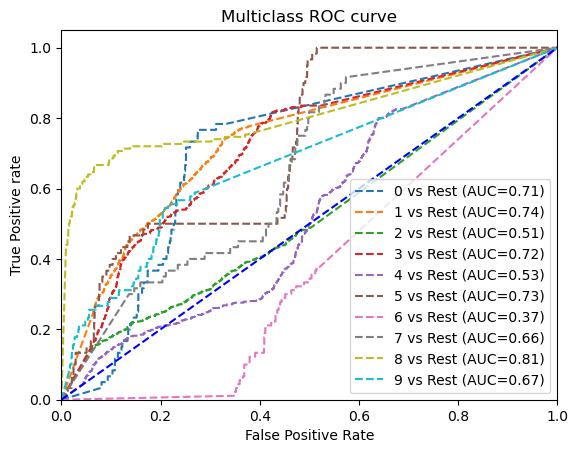

In [104]:
plot_roc_curves(y_test, pred_prob)

# Feature selection

In [105]:
from sklearn.model_selection import train_test_split

## Method 1: ANOVA (Analysis of Variance)

We find the most apt features by calculating the F-values for each feature and then selecting the best scoring features by using Scikit's select best k features function. We then create 3 sub datasets, df_1, df_2 and df_3 each containing the best 5, 10 and 20 features for each output class.

In [106]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
def selectFTest(top_features, x_train_arg, y_train_arg, range_arg):
    selected_features = []

    for y_class in range(range_arg):
        selector = SelectKBest(score_func=f_classif, k=top_features)
        selector.fit(x_train_arg, (y_train_arg == y_class).astype(int))
        selected_indices = selector.get_support(indices=True)
        selected_features.extend(selected_indices)

    return x_train_arg.iloc[:, selected_features]

df_1_1 = selectFTest(5, X_train, y_train, 10) # 50 features
df_1_2 = selectFTest(10, X_train, y_train, 10) # 100 features
df_1_3 = selectFTest(20, X_train, y_train, 10) # 200 features

In [107]:
df_1_1.head()

,2213,2260,2261,2262,2263,1072,1073,1074,1120,1121,...,1666,1714,1715,1743,1761,1086,1134,1215,1216,1263
0,73.0,73.0,72.0,71.0,68.0,184.0,174.0,163.0,207.0,197.0,...,102.0,99.0,95.0,118.0,108.0,123.0,127.0,220.0,231.0,226.0
1,89.0,91.0,85.0,76.0,70.0,169.0,192.0,195.0,183.0,203.0,...,99.0,118.0,111.0,98.0,133.0,185.0,193.0,124.0,199.0,123.0
2,92.0,90.0,81.0,71.0,66.0,196.0,191.0,179.0,211.0,207.0,...,101.0,122.0,114.0,112.0,136.0,161.0,167.0,196.0,225.0,208.0
3,100.0,86.0,92.0,81.0,72.0,213.0,204.0,207.0,227.0,218.0,...,113.0,124.0,116.0,105.0,134.0,177.0,179.0,206.0,230.0,191.0
4,138.0,123.0,126.0,127.0,128.0,163.0,162.0,150.0,178.0,170.0,...,104.0,87.0,81.0,92.0,102.0,139.0,186.0,199.0,202.0,209.0


In [108]:
df_1_2.head()

,2165,2212,2213,2214,2215,2260,2261,2262,2263,2264,...,1086,1134,1167,1168,1215,1216,1263,1561,1562,1610
0,77.0,77.0,73.0,72.0,72.0,73.0,72.0,71.0,68.0,75.0,...,123.0,127.0,211.0,224.0,220.0,231.0,226.0,225.0,225.0,236.0
1,98.0,94.0,89.0,85.0,81.0,91.0,85.0,76.0,70.0,71.0,...,185.0,193.0,122.0,198.0,124.0,199.0,123.0,231.0,232.0,237.0
2,108.0,99.0,92.0,86.0,81.0,90.0,81.0,71.0,66.0,68.0,...,161.0,167.0,189.0,220.0,196.0,225.0,208.0,234.0,235.0,233.0
3,111.0,96.0,100.0,87.0,80.0,86.0,92.0,81.0,72.0,63.0,...,177.0,179.0,202.0,233.0,206.0,230.0,191.0,237.0,237.0,217.0
4,144.0,136.0,138.0,131.0,121.0,123.0,126.0,127.0,128.0,129.0,...,139.0,186.0,186.0,180.0,199.0,202.0,209.0,152.0,169.0,214.0


In [109]:
df_1_3.head()

,1979,2025,2026,2027,2028,2164,2165,2166,2211,2212,...,1214,1215,1216,1262,1263,1264,1311,1561,1562,1610
0,130.0,155.0,150.0,146.0,143.0,85.0,77.0,76.0,87.0,77.0,...,168.0,220.0,231.0,176.0,226.0,234.0,213.0,225.0,225.0,236.0
1,139.0,117.0,139.0,144.0,144.0,100.0,98.0,99.0,95.0,94.0,...,95.0,124.0,199.0,100.0,123.0,194.0,113.0,231.0,232.0,237.0
2,132.0,127.0,147.0,138.0,131.0,110.0,108.0,105.0,100.0,99.0,...,147.0,196.0,225.0,153.0,208.0,227.0,180.0,234.0,235.0,233.0
3,146.0,121.0,140.0,144.0,143.0,108.0,111.0,97.0,92.0,96.0,...,167.0,206.0,230.0,142.0,191.0,225.0,170.0,237.0,237.0,217.0
4,141.0,89.0,125.0,142.0,137.0,142.0,144.0,132.0,136.0,136.0,...,162.0,199.0,202.0,158.0,209.0,224.0,216.0,152.0,169.0,214.0


# Running Bayes Classifier on all three datasets

# Method 1: Dataset 1

In [110]:
model_1_1 = GaussianNB()

# Getting training and testing dataset for dataset 1

We split the first dataset with 50 features to training and testing data set

In [111]:
x_train_1_1, x_test_1_1, y_train_1_1, y_test_1_1, = train_test_split(df_1_1, y_train, test_size=0.25)

# Training model 1

In [112]:
model_1_1.fit(x_train_1_1, y_train_1_1)

GaussianNB()

# Test the Model 1

In [113]:
# Model testing
y_pred_1_1 = model_1_1.predict(x_test_1_1)
#  returns the probabilities associated with each class
pred_prob_1_1 =  model_1_1.predict_proba(x_test_1_1)

# Confusion Matrix for dataset 1

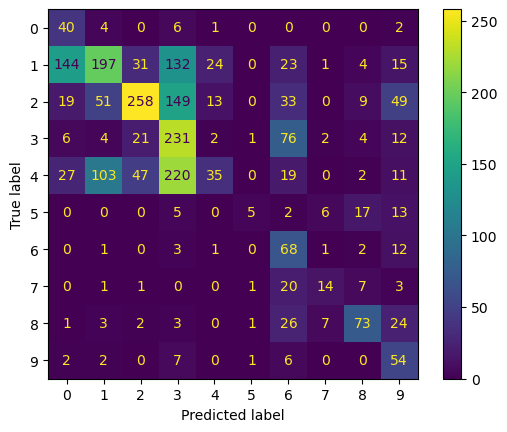

In [114]:
confusion_matrix_1_1 = confusion_matrix(y_test_1_1, y_pred_1_1, labels=labels)
plot_confusion_matrix(confusion_matrix_1_1);

# Evaluation of the model 1

In [115]:
accuracy_1_1,f1_1_1,precision_1_1,recall_1_1 = overall_model_eval(y_test_1_1, y_pred_1_1)

Accuracy: 0.4023937267849773
F1 Score: 0.3916249177618353
Precision: 0.5085985676076963
Recall: 0.4023937267849773


# Evaluating metrics against each category

In [116]:
TPR_1_1, TNR_1_1, PPV_1_1, NPV_1_1, FPR_1_1, FNR_1_1, FDR_1_1, ACC_1_1 = each_cat_eval(confusion_matrix_1_1)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.754717  0.916034   0.167364  0.994048  0.083966  0.245283  0.832636   
1  0.345009  0.908747   0.538251  0.818182  0.091253  0.654991  0.461749   
2  0.444062  0.944625   0.716667  0.843432  0.055375  0.555938  0.283333   
3  0.643454  0.745640   0.305556  0.923215  0.254360  0.356546  0.694444   
4  0.075431  0.979071   0.460526  0.817213  0.020929  0.924569  0.539474   
5  0.104167  0.998316   0.555556  0.982187  0.001684  0.895833  0.444444   
6  0.772727  0.912206   0.249084  0.990698  0.087794  0.227273  0.750916   
7  0.297872  0.992845   0.451613  0.986204  0.007155  0.702128  0.548387   
8  0.521429  0.980289   0.618644  0.970933  0.019711  0.478571  0.381356   
9  0.750000  0.940026   0.276923  0.991921  0.059974  0.250000  0.723077   

        ACC  
0  0.912505  
1  0.775898  
2  0.824598  
3  0.730499  
4  0.806026  
5  0.980603  
6  0.907140  
7  0.979364  
8  0.953776  


In [117]:
print(classification_report(y_test_1_1, y_pred_1_1, target_names=label_names))

              precision    recall  f1-score   support

           0       0.17      0.75      0.27        53
           1       0.54      0.35      0.42       571
           2       0.72      0.44      0.55       581
           3       0.31      0.64      0.41       359
           4       0.46      0.08      0.13       464
           5       0.56      0.10      0.18        48
           6       0.25      0.77      0.38        88
           7       0.45      0.30      0.36        47
           8       0.62      0.52      0.57       140
           9       0.28      0.75      0.40        72

    accuracy                           0.40      2423
   macro avg       0.43      0.47      0.37      2423
weighted avg       0.51      0.40      0.39      2423



# Cross Validation using k_fold for dataset 1

In [118]:
cross_validation_kfold(model_1_1,x_train_1_1,y_train_1_1)

[0.36176066 0.40990371 0.4085282  0.42503439 0.32874828 0.38514443
 0.34387895 0.35812672 0.33746556 0.3677686 ]


# ROC Curves for dataset 1

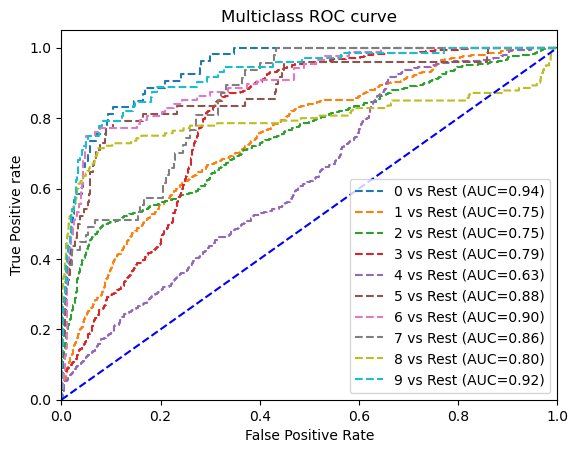

In [119]:
plot_roc_curves(y_test_1_1, pred_prob_1_1)

# Method 1: Dataset 2

In [120]:
# Build a Gaussian Classifier
model_1_2 = GaussianNB()

# Getting training and testing dataset for dataset 2

We split the first dataset with 100 features to training and testing data set

In [121]:
x_train_1_2, x_test_1_2, y_train_1_2, y_test_1_2, = train_test_split(df_1_2, y_train, test_size=0.25)

# Train the model 2

In [122]:
# Model training
model_1_2.fit(x_train_1_2, y_train_1_2)

GaussianNB()

# Test the model 2

In [123]:
# Model testing
y_pred_1_2 = model_1_2.predict(x_test_1_2)
#  returns the probabilities associated with each class
pred_prob_1_2 =  model_1_2.predict_proba(x_test_1_2)

# Confusion Matrix for dataset 2

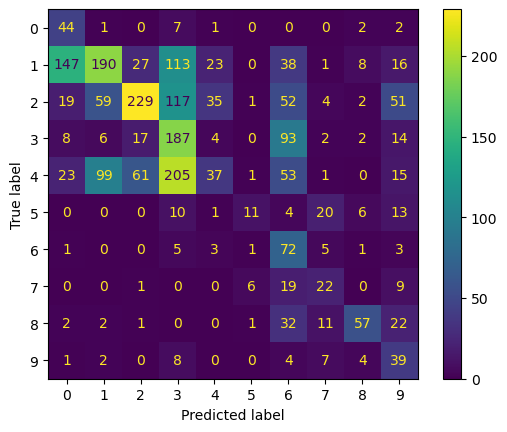

In [124]:
confusion_matrix_1_2 = confusion_matrix(y_test_1_2, y_pred_1_2, labels=labels)
plot_confusion_matrix(confusion_matrix_1_2);

# Evaluation of the model 2

In [125]:
accuracy_1_2, f1_1_2, precision_1_2,recall_1_2 = overall_model_eval(y_test_1_2, y_pred_1_2)

Accuracy: 0.3664878250103178
F1 Score: 0.3625982480901297
Precision: 0.4702635937410308
Recall: 0.3664878250103178


# Evaluating the metrics against each category

In [126]:
TPR_1_2, TNR_1_2, PPV_1_2, NPV_1_2, FPR_1_2, FNR_1_2, FDR_1_2, ACC_1_2 = each_cat_eval(confusion_matrix_1_2)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.771930  0.915046   0.179592  0.994031  0.084954  0.228070  0.820408   
1  0.337478  0.909140   0.529248  0.819283  0.090860  0.662522  0.470752   
2  0.402460  0.942287   0.681548  0.837087  0.057713  0.597540  0.318452   
3  0.561562  0.777512   0.286810  0.917561  0.222488  0.438438  0.713190   
4  0.074747  0.965249   0.355769  0.802501  0.034751  0.925253  0.644231   
5  0.169231  0.995759   0.523810  0.977519  0.004241  0.830769  0.476190   
6  0.791209  0.873499   0.196185  0.990759  0.126501  0.208791  0.803815   
7  0.385965  0.978445   0.301370  0.985106  0.021555  0.614035  0.698630   
8  0.445312  0.989107   0.695122  0.969671  0.010893  0.554688  0.304878   
9  0.600000  0.938507   0.211957  0.988388  0.061493  0.400000  0.788043   

        ACC  
0  0.911680  
1  0.776310  
2  0.815518  
3  0.747833  
4  0.783326  
5  0.973586  
6  0.870409  
7  0.964507  
8  0.960380  


In [127]:
print(classification_report(y_test_1_2, y_pred_1_2, target_names=label_names))

              precision    recall  f1-score   support

           0       0.18      0.77      0.29        57
           1       0.53      0.34      0.41       563
           2       0.68      0.40      0.51       569
           3       0.29      0.56      0.38       333
           4       0.36      0.07      0.12       495
           5       0.52      0.17      0.26        65
           6       0.20      0.79      0.31        91
           7       0.30      0.39      0.34        57
           8       0.70      0.45      0.54       128
           9       0.21      0.60      0.31        65

    accuracy                           0.37      2423
   macro avg       0.40      0.45      0.35      2423
weighted avg       0.47      0.37      0.36      2423



# Cross Validation using k-fold for dataset 2

In [128]:
cross_validation_kfold(model_1_2, x_train_1_2, y_train_1_2)

[0.36313618 0.37001376 0.39064649 0.37138927 0.39064649 0.39614856
 0.36176066 0.35812672 0.34848485 0.39807163]


# ROC Curves for dataset 2

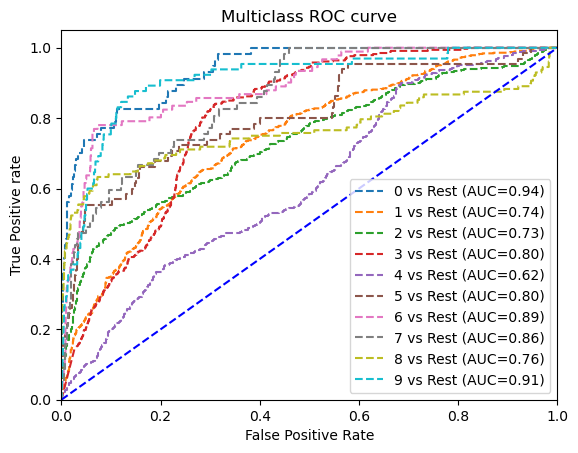

In [129]:
plot_roc_curves(y_test_1_2, pred_prob_1_2)

# Method 1: Dataset 3

We will work on the dataset with 200 features.

In [130]:
# Build a Gaussian Classifier
model_1_3 = GaussianNB()

# Getting training and testing dataset for dataset 3

We split the first dataset with 200 features to training and testing data set

In [131]:
x_train_1_3, x_test_1_3, y_train_1_3, y_test_1_3, = train_test_split(df_1_3, y_train, test_size=0.25)


# Train the model 3

In [132]:
# Model training
model_1_3.fit(x_train_1_3, y_train_1_3)

GaussianNB()

# Test the Model 3

In [133]:
# Model testing
y_pred_1_3 = model_1_3.predict(x_test_1_3)
#  returns the probabilities associated with each class
pred_prob_1_3 =  model_1_3.predict_proba(x_test_1_3)

# Confusion Matrix for dataset 3

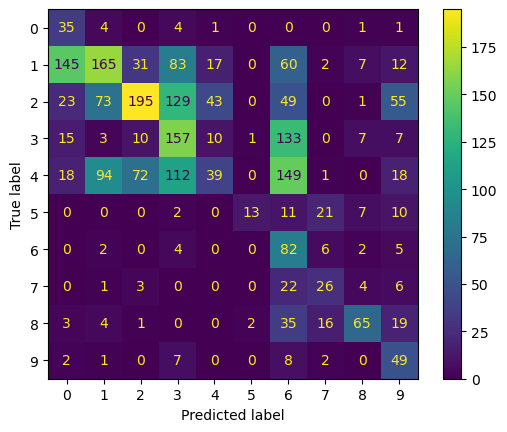

In [134]:
confusion_matrix_1_3 = confusion_matrix(y_test_1_3, y_pred_1_3, labels=labels)
plot_confusion_matrix(confusion_matrix_1_3);

# Evaluation of the model

In [135]:
accuracy_1_3, f1_1_3, precision_1_3,recall_1_3 = overall_model_eval(y_test_1_3, y_pred_1_3)

Accuracy: 0.34089971110193973
F1 Score: 0.342155012855116
Precision: 0.4556652623633161
Recall: 0.34089971110193973


# Evaluating the metrics against each category:

In [136]:
TPR_1_3, TNR_1_3, PPV_1_3, NPV_1_3, FPR_1_3, FNR_1_3, FDR_1_3, ACC_1_3 = each_cat_eval(confusion_matrix_1_3)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.760870  0.913336   0.145228  0.994959  0.086664  0.239130  0.854772   
1  0.316092  0.904261   0.475504  0.828035  0.095739  0.683908  0.524496   
2  0.343310  0.936927   0.625000  0.823306  0.063073  0.656690  0.375000   
3  0.457726  0.836058   0.315261  0.903377  0.163942  0.542274  0.684739   
4  0.077535  0.963021   0.354545  0.799395  0.036979  0.922465  0.645455   
5  0.203125  0.998728   0.812500  0.978812  0.001272  0.796875  0.187500   
6  0.811881  0.798880   0.149362  0.989861  0.201120  0.188119  0.850638   
7  0.419355  0.979670   0.351351  0.984674  0.020330  0.580645  0.648649   
8  0.448276  0.987270   0.691489  0.965650  0.012730  0.551724  0.308511   
9  0.710145  0.943500   0.269231  0.991075  0.056500  0.289855  0.730769   

        ACC  
0  0.910442  
1  0.777548  
2  0.797771  
3  0.782501  
4  0.779199  
5  0.977714  
6  0.799422  
7  0.965332  
8  0.955014  


In [137]:
print(classification_report(y_test_1_3, y_pred_1_3, target_names=label_names))

              precision    recall  f1-score   support

           0       0.15      0.76      0.24        46
           1       0.48      0.32      0.38       522
           2       0.62      0.34      0.44       568
           3       0.32      0.46      0.37       343
           4       0.35      0.08      0.13       503
           5       0.81      0.20      0.33        64
           6       0.15      0.81      0.25       101
           7       0.35      0.42      0.38        62
           8       0.69      0.45      0.54       145
           9       0.27      0.71      0.39        69

    accuracy                           0.34      2423
   macro avg       0.42      0.45      0.35      2423
weighted avg       0.46      0.34      0.34      2423



# Cross Validation using k-fold on dataset 3

In [138]:
cross_validation_kfold(model_1_3, x_train_1_3, y_train_1_3)

[0.33562586 0.32049519 0.34662999 0.34662999 0.2957359  0.31224209
 0.33287483 0.3553719  0.32644628 0.37190083]


# ROC Curves for dataset 3

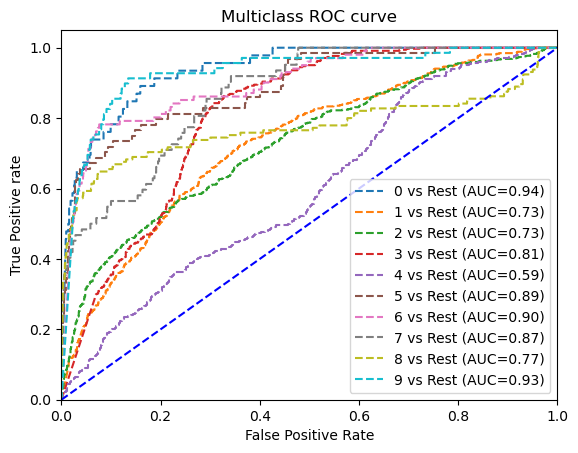

In [139]:
plot_roc_curves(y_test_1_3, pred_prob_1_3)

# Method 2:  Chi-square test

The Chi-square test is a statistical test that is used to determine whether there is a significant difference between the observed frequency of a categorical variable and the expected frequency based on the assumption of independence. It can be used to select the best categorical features for a classification model.

In [140]:
from sklearn.feature_selection import chi2

def selectChiTest(top_features):
    selected_features = []

    for y_class in range(10):
        selector = SelectKBest(score_func=chi2, k=top_features)
        selector.fit(X_train, (y_train == y_class).astype(int))
        selected_indices = selector.get_support(indices=True)
        selected_features.extend(selected_indices)

    return X_train.iloc[:, selected_features]

df_2_1 = selectChiTest(5) # 50 features
df_2_2 = selectChiTest(10) # 100 features
df_2_3 = selectChiTest(20) # 200 features

In [141]:
df_2_1.head()

,2213,2260,2261,2262,2263,1073,1074,1120,1121,1168,...,1666,1695,1713,1714,1743,1134,1167,1215,1216,1263
0,73.0,73.0,72.0,71.0,68.0,174.0,163.0,207.0,197.0,224.0,...,102.0,110.0,103.0,99.0,118.0,127.0,211.0,220.0,231.0,226.0
1,89.0,91.0,85.0,76.0,70.0,192.0,195.0,183.0,203.0,198.0,...,99.0,99.0,118.0,118.0,98.0,193.0,122.0,124.0,199.0,123.0
2,92.0,90.0,81.0,71.0,66.0,191.0,179.0,211.0,207.0,220.0,...,101.0,107.0,118.0,122.0,112.0,167.0,189.0,196.0,225.0,208.0
3,100.0,86.0,92.0,81.0,72.0,204.0,207.0,227.0,218.0,233.0,...,113.0,110.0,123.0,124.0,105.0,179.0,202.0,206.0,230.0,191.0
4,138.0,123.0,126.0,127.0,128.0,162.0,150.0,178.0,170.0,180.0,...,104.0,79.0,114.0,87.0,92.0,186.0,186.0,199.0,202.0,209.0


In [142]:
df_2_2.head()

,2165,2212,2213,2214,2215,2260,2261,2262,2263,2264,...,1086,1134,1167,1168,1215,1216,1262,1263,1264,1311
0,77.0,77.0,73.0,72.0,72.0,73.0,72.0,71.0,68.0,75.0,...,123.0,127.0,211.0,224.0,220.0,231.0,176.0,226.0,234.0,213.0
1,98.0,94.0,89.0,85.0,81.0,91.0,85.0,76.0,70.0,71.0,...,185.0,193.0,122.0,198.0,124.0,199.0,100.0,123.0,194.0,113.0
2,108.0,99.0,92.0,86.0,81.0,90.0,81.0,71.0,66.0,68.0,...,161.0,167.0,189.0,220.0,196.0,225.0,153.0,208.0,227.0,180.0
3,111.0,96.0,100.0,87.0,80.0,86.0,92.0,81.0,72.0,63.0,...,177.0,179.0,202.0,233.0,206.0,230.0,142.0,191.0,225.0,170.0
4,144.0,136.0,138.0,131.0,121.0,123.0,126.0,127.0,128.0,129.0,...,139.0,186.0,186.0,180.0,199.0,202.0,158.0,209.0,224.0,216.0


In [143]:
df_2_3.head()

,2117,2118,2164,2165,2166,2167,2211,2212,2213,2214,...,1183,1214,1215,1216,1262,1263,1264,1310,1311,1610
0,104.0,103.0,85.0,77.0,76.0,77.0,87.0,77.0,73.0,72.0,...,157.0,168.0,220.0,231.0,176.0,226.0,234.0,157.0,213.0,236.0
1,122.0,119.0,100.0,98.0,99.0,97.0,95.0,94.0,89.0,85.0,...,174.0,95.0,124.0,199.0,100.0,123.0,194.0,87.0,113.0,237.0
2,118.0,114.0,110.0,108.0,105.0,102.0,100.0,99.0,92.0,86.0,...,137.0,147.0,196.0,225.0,153.0,208.0,227.0,130.0,180.0,233.0
3,123.0,118.0,108.0,111.0,97.0,93.0,92.0,96.0,100.0,87.0,...,115.0,167.0,206.0,230.0,142.0,191.0,225.0,118.0,170.0,217.0
4,120.0,120.0,142.0,144.0,132.0,113.0,136.0,136.0,138.0,131.0,...,175.0,162.0,199.0,202.0,158.0,209.0,224.0,162.0,216.0,214.0


# Running Bayes Classifier on all three datasets

# Method 2: Dataset 1

In [144]:
model_2_1 = GaussianNB()

# Getting training and testing dataset for dataset 1

We split the first dataset with 50 features to training and testing data set

In [145]:
x_train_2_1, x_test_2_1, y_train_2_1, y_test_2_1, = train_test_split(df_2_1, y_train, test_size=0.25)

# Training model 1

In [146]:
model_2_1.fit(x_train_2_1, y_train_2_1)

GaussianNB()

# Test the Model 1

In [147]:
# Model testing
y_pred_2_1 = model_2_1.predict(x_test_2_1)
#  returns the probabilities associated with each class
pred_prob_2_1 =  model_2_1.predict_proba(x_test_2_1)

# Confusion Matrix for dataset 1

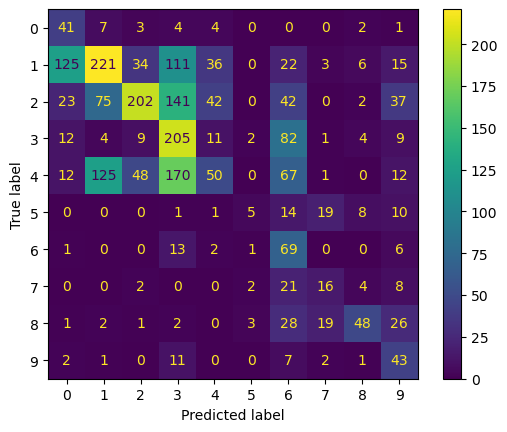

In [148]:
confusion_matrix_2_1 = confusion_matrix(y_test_2_1, y_pred_2_1, labels=labels)
plot_confusion_matrix(confusion_matrix_2_1);

# Evaluation of the model 1

In [149]:
accuracy_2_1, f1_2_1, precision_2_1,recall_2_1 = overall_model_eval(y_test_2_1, y_pred_2_1)

Accuracy: 0.3714403631861329
F1 Score: 0.36604173129249845
Precision: 0.45821751645648756
Recall: 0.3714403631861329


# Evaluating metrics against each category

In [150]:
TPR_2_1, TNR_2_1, PPV_2_1, NPV_2_1, FPR_2_1, FNR_2_1, FDR_2_1, ACC_2_1 = each_cat_eval(confusion_matrix_2_1)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.661290  0.925455   0.188940  0.990481  0.074545  0.338710  0.811060   
1  0.385689  0.884324   0.508046  0.822938  0.115676  0.614311  0.491954   
2  0.358156  0.947821   0.675585  0.829567  0.052179  0.641844  0.324415   
3  0.604720  0.782630   0.311550  0.924079  0.217370  0.395280  0.688450   
4  0.103093  0.950464   0.342466  0.808959  0.049536  0.896907  0.657534   
5  0.086207  0.996617   0.384615  0.978008  0.003383  0.913793  0.615385   
6  0.750000  0.878593   0.196023  0.988894  0.121407  0.250000  0.803977   
7  0.301887  0.981013   0.262295  0.984335  0.018987  0.698113  0.737705   
8  0.369231  0.988225   0.640000  0.965077  0.011775  0.630769  0.360000   
9  0.641791  0.947368   0.257485  0.989362  0.052632  0.358209  0.742515   

        ACC  
0  0.918696  
1  0.766405  
2  0.810565  
3  0.757738  
4  0.780850  
5  0.974825  
6  0.873710  
7  0.966158  
8  0.955014  


In [151]:
print(classification_report(y_test_2_1, y_pred_2_1, target_names=label_names))

              precision    recall  f1-score   support

           0       0.19      0.66      0.29        62
           1       0.51      0.39      0.44       573
           2       0.68      0.36      0.47       564
           3       0.31      0.60      0.41       339
           4       0.34      0.10      0.16       485
           5       0.38      0.09      0.14        58
           6       0.20      0.75      0.31        92
           7       0.26      0.30      0.28        53
           8       0.64      0.37      0.47       130
           9       0.26      0.64      0.37        67

    accuracy                           0.37      2423
   macro avg       0.38      0.43      0.33      2423
weighted avg       0.46      0.37      0.37      2423



# Cross Validation using k_fold for dataset 1

In [152]:
cross_validation_kfold(model_2_1, x_train_2_1, y_train_2_1)

[0.37964237 0.38651994 0.37689133 0.41265475 0.34250344 0.34525447
 0.38927098 0.34986226 0.36088154 0.36639118]


# ROC Curves for dataset 1

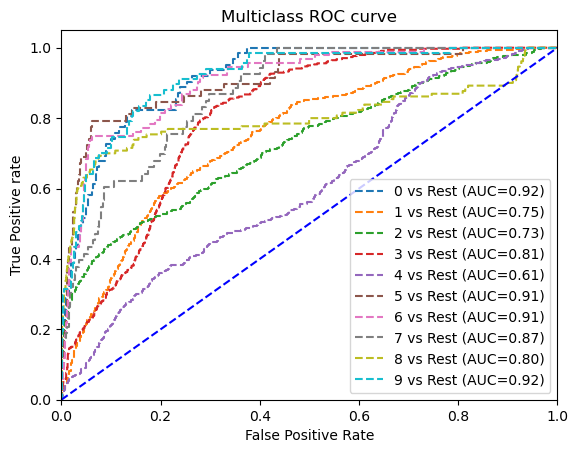

In [153]:
plot_roc_curves(y_test_2_1, pred_prob_2_1)

# Method2: Dataset 2

In [154]:
# Build a Gaussian Classifier
model_2_2 = GaussianNB()

# Getting training and testing dataset for dataset 2

We split the first dataset with 100 features to training and testing data set

In [155]:
x_train_2_2, x_test_2_2, y_train_2_2, y_test_2_2, = train_test_split(df_2_2, y_train, test_size=0.25)

# Train the model 2

In [156]:
# Model training
model_2_2.fit(x_train_2_2, y_train_2_2)

GaussianNB()

# Test the model 2

In [157]:
# Model testing
y_pred_2_2 = model_2_2.predict(x_test_2_2)
#  returns the probabilities associated with each class
pred_prob_2_2 =  model_2_2.predict_proba(x_test_2_2)

# Confusion Matrix for dataset 2

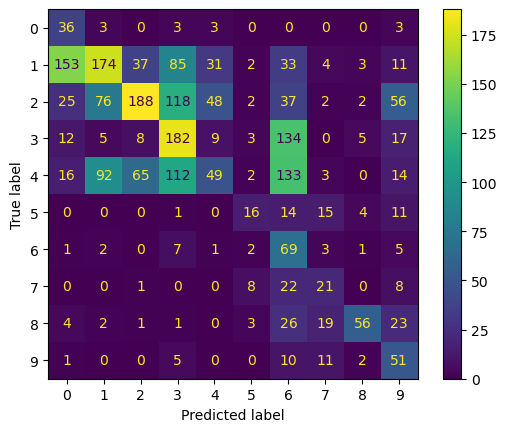

In [158]:
confusion_matrix_2_2 = confusion_matrix(y_test_2_2, y_pred_2_2, labels=labels)
plot_confusion_matrix(confusion_matrix_2_2);

# Evaluation of the model 2

In [159]:
accuracy_2_2, f1_2_2, precision_2_2,recall_2_2 = overall_model_eval(y_test_2_2, y_pred_2_2)

Accuracy: 0.34750309533635987
F1 Score: 0.3533628653143085
Precision: 0.452677689082566
Recall: 0.34750309533635987


# Evaluating the metrics against each category

In [160]:
TPR_2_2, TNR_2_2, PPV_2_2, NPV_2_2, FPR_2_2, FNR_2_2, FDR_2_2, ACC_2_2 = each_cat_eval(confusion_matrix_2_2)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.750000  0.910737   0.145161  0.994483  0.089263  0.250000  0.854839   
1  0.326454  0.904762   0.491525  0.826486  0.095238  0.673546  0.508475   
2  0.339350  0.940075   0.626667  0.827602  0.059925  0.660650  0.373333   
3  0.485333  0.837891   0.354086  0.898900  0.162109  0.514667  0.645914   
4  0.100823  0.952504   0.347518  0.808501  0.047496  0.899177  0.652482   
5  0.262295  0.990686   0.421053  0.981132  0.009314  0.737705  0.578947   
6  0.758242  0.824614   0.144351  0.988689  0.175386  0.241758  0.855649   
7  0.350000  0.975878   0.269231  0.983369  0.024122  0.650000  0.730769   
8  0.414815  0.992570   0.767123  0.966383  0.007430  0.585185  0.232877   
9  0.637500  0.936833   0.256281  0.986960  0.063167  0.362500  0.743719   

        ACC  
0  0.907553  
1  0.777548  
2  0.802724  
3  0.783326  
4  0.781676  
5  0.972348  
6  0.822121  
7  0.960380  
8  0.960380  


In [161]:
print(classification_report(y_test_1_2, y_pred_1_2, target_names=label_names))

              precision    recall  f1-score   support

           0       0.18      0.77      0.29        57
           1       0.53      0.34      0.41       563
           2       0.68      0.40      0.51       569
           3       0.29      0.56      0.38       333
           4       0.36      0.07      0.12       495
           5       0.52      0.17      0.26        65
           6       0.20      0.79      0.31        91
           7       0.30      0.39      0.34        57
           8       0.70      0.45      0.54       128
           9       0.21      0.60      0.31        65

    accuracy                           0.37      2423
   macro avg       0.40      0.45      0.35      2423
weighted avg       0.47      0.37      0.36      2423



# Cross Validation using k_fold for dataset 2

In [162]:
cross_validation_kfold(model_2_2, x_train_2_2, y_train_2_2)

[0.35488308 0.34662999 0.31224209 0.31911967 0.33149931 0.34112792
 0.34525447 0.32782369 0.31818182 0.32782369]


# ROC Curves for dataset 2

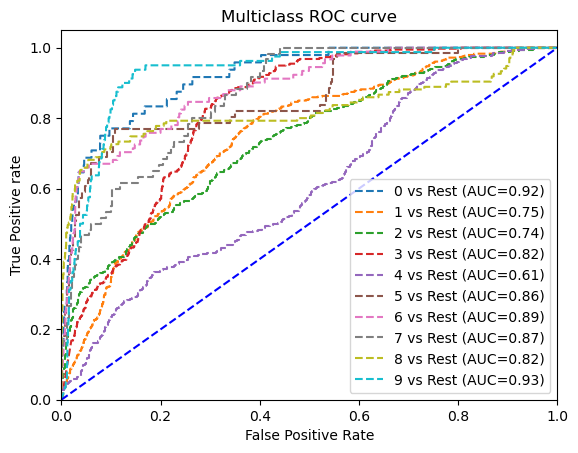

In [163]:
plot_roc_curves(y_test_2_2, pred_prob_2_2)

# Method2: Dataset 3

In [164]:
# Build a Gaussian Classifier
model_2_3 = GaussianNB()

# Getting training and testing dataset for dataset 3¶
We split the first dataset with 100 features to training and testing data set

In [165]:
x_train_2_3, x_test_2_3, y_train_2_3, y_test_2_3, = train_test_split(df_2_3, y_train, test_size=0.25)

# Train the model 3

In [166]:
# Model training
model_2_3.fit(x_train_2_3, y_train_2_3)

GaussianNB()

# Test the model 3

In [167]:
# Model testing
y_pred_2_3 = model_2_3.predict(x_test_2_3)
#  returns the probabilities associated with each class
pred_prob_2_3 =  model_2_3.predict_proba(x_test_2_3)

# Confusion Matrix for dataset 3

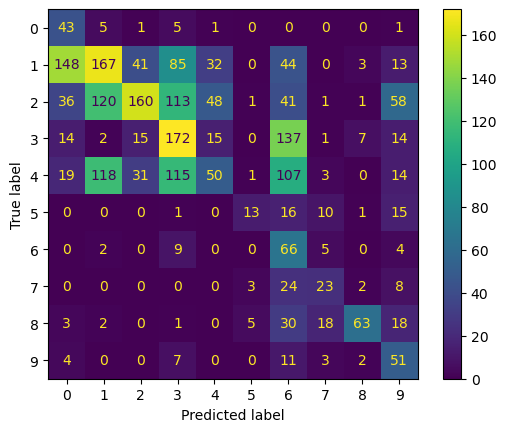

In [168]:
confusion_matrix_2_3 = confusion_matrix(y_test_2_3, y_pred_2_3, labels=labels)
plot_confusion_matrix(confusion_matrix_2_3);

# Evaluation of the model 3

In [169]:
accuracy_2_3, f1_2_3, precision_2_3, recall_2_3 = overall_model_eval(y_test_2_3, y_pred_2_3)

Accuracy: 0.3334709038382171
F1 Score: 0.3381667575435617
Precision: 0.4449489804774696
Recall: 0.3334709038382171


# Evaluating the metrics against each category

In [170]:
TPR_2_3, TNR_2_3, PPV_2_3, NPV_2_3, FPR_2_3, FNR_2_3, FDR_2_3, ACC_2_3 = each_cat_eval(confusion_matrix_2_3)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.767857  0.905365   0.161049  0.993970  0.094635  0.232143  0.838951   
1  0.313321  0.868254   0.401442  0.817638  0.131746  0.686679  0.598558   
2  0.276339  0.952278   0.645161  0.807356  0.047722  0.723661  0.354839   
3  0.456233  0.835777   0.338583  0.892950  0.164223  0.543767  0.661417   
4  0.109170  0.951145   0.342466  0.820817  0.048855  0.890830  0.657534   
5  0.232143  0.995775   0.565217  0.982083  0.004225  0.767857  0.434783   
6  0.767442  0.824561   0.138655  0.989728  0.175439  0.232558  0.861345   
7  0.383333  0.982649   0.359375  0.984315  0.017351  0.616667  0.640625   
8  0.450000  0.992992   0.797468  0.967150  0.007008  0.550000  0.202532   
9  0.653846  0.938166   0.260204  0.987876  0.061834  0.346154  0.739796   

        ACC  
0  0.902187  
1  0.746182  
2  0.790755  
3  0.776723  
4  0.791993  
5  0.978126  
6  0.822534  
7  0.967809  
8  0.961618  


In [171]:
print(classification_report(y_test_1_2, y_pred_1_2, target_names=label_names))

              precision    recall  f1-score   support

           0       0.18      0.77      0.29        57
           1       0.53      0.34      0.41       563
           2       0.68      0.40      0.51       569
           3       0.29      0.56      0.38       333
           4       0.36      0.07      0.12       495
           5       0.52      0.17      0.26        65
           6       0.20      0.79      0.31        91
           7       0.30      0.39      0.34        57
           8       0.70      0.45      0.54       128
           9       0.21      0.60      0.31        65

    accuracy                           0.37      2423
   macro avg       0.40      0.45      0.35      2423
weighted avg       0.47      0.37      0.36      2423



# Cross Validation using k_fold for dataset 3

In [172]:
cross_validation_kfold(model_2_3, x_train_2_3, y_train_2_3)

[0.30536451 0.36313618 0.33287483 0.303989   0.28885832 0.30674003
 0.30261348 0.32231405 0.34022039 0.30991736]


# ROC Curves for dataset 3

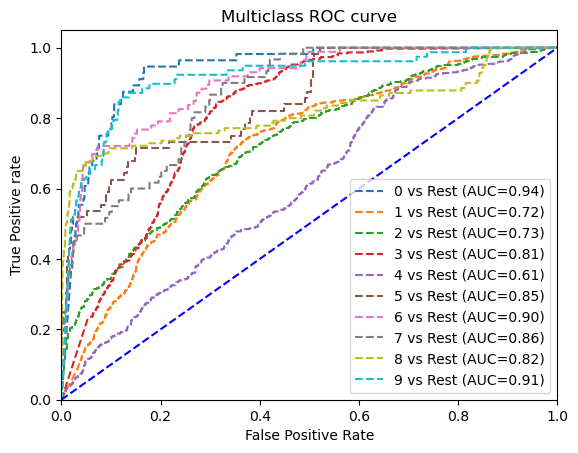

In [173]:
plot_roc_curves(y_test_2_3, pred_prob_2_3)

# Conclusions 

# Method 1: ANOVA (Analysis of Variance)

Comparing CW dataset against the three datasets we get using method 1 (Analysis of Variance).

In [174]:
# Create a dataFrame using dictionary
df_1=pd.DataFrame({"Accuracy":[accuracy_orig,accuracy_1_1,accuracy_1_2,accuracy_1_3],
                "F1 Score":[f1_orig,f1_1_1,f1_1_2,f1_1_3], "Precision":[precision_orig, precision_1_1, precision_1_2, precision_1_3],
                 "Recall":[recall_orig,recall_1_1,recall_1_2,recall_1_3]})
# Change the row indexes
df_1.index = ['Original Dataset', 'Dataset 1', 'Dataset 2', 'Dataset 3'];
print(df_1)

                  Accuracy  F1 Score  Precision    Recall
Original Dataset  0.171521  0.224885   0.366999  0.171521
Dataset 1         0.402394  0.391625   0.508599  0.402394
Dataset 2         0.366488  0.362598   0.470264  0.366488
Dataset 3         0.340900  0.342155   0.455665  0.340900


The accuracy measures the overall correctness of the prediction of the model, so among the three dataset we see that dataset 1 has the highest accuracy of 0.381758 followed by dataset 3 with an accuracy of 0.33347 and finally the dataset 2 with an accuracy of 0.327280. However, we see that all the 3 accuracies are relatively low. 
This indicate that all models in all 3 datasets are not performing well in making correct predictions.


F1 score is the harmonic mean of precision and recall. On observing the F1 score for all 3 datasets, dataset-2 and 3 have the similar F1, whereas the dataset 1 is having slightly lower F1 score of 0.373538. From this we can draw a conclusion that dataset 1 has slightly better balance between precision and recall.

Precision is used to measure the model’s ability to correctly classify positive instances. When we look at the precision of all 3 datasets we see that dataset 1 has the highest precision of 0.481140 then comes dataset 2 with precision of 0.453592 and dataset 3 with 0.445920. This indicates that dataset 1 is better at avoiding false positives.

Recall is used to measure the model’s ability to identify all positive instances. When we look at the recall values, we see that the values are equal to their respective accuracy values. Therefore, we can draw similar conclusion that we made for accuracy i.e. that dataset 1 has the highest recall of 0.381758 followed by dataset 3 with an recall of 0.33347 and finally the dataset 2 with an recall of 0.327280. Higher recall values suggest that the model is better at identifying positive instances while lower recall values indicate less effective in identifying positive instances.

# Method 2: Chi-square test

Comparing CW dataset against the three datasets we get using method 2 (Chi-square test).

In [175]:
# Create a dataFrame using dictionary
df_2=pd.DataFrame({"Accuracy":[accuracy_orig,accuracy_2_1,accuracy_2_2,accuracy_2_3],
                "F1 Score":[f1_orig,f1_2_1,f1_2_2,f1_2_3], "Precision":[precision_orig, precision_2_1, precision_2_2, precision_2_3],
                 "Recall":[recall_orig,recall_2_1,recall_2_2,recall_2_3]})
# Change the row indexes
df_2.index = ['Original Dataset', 'Dataset 1', 'Dataset 2', 'Dataset 3'];
print(df_2)

                  Accuracy  F1 Score  Precision    Recall
Original Dataset  0.171521  0.224885   0.366999  0.171521
Dataset 1         0.371440  0.366042   0.458218  0.371440
Dataset 2         0.347503  0.353363   0.452678  0.347503
Dataset 3         0.333471  0.338167   0.444949  0.333471


The accuracy measures the overall correctness of the prediction of the model, so among the three dataset we see that dataset 3 has the highest accuracy of 0.355757, dataset 1 and dataset 2 have similar accuracy. However, we see that all the 3 accuracies are relatively low. 
This indicate that all models in all 3 datasets are not performing well in making correct predictions.

F1 score is the harmonic mean of precision and recall. On observing the F1 score for all 3 datasets, dataset-2 and 3 have the similar F1, whereas the dataset 1 is having slightly lower F1 score of 0.344194. From this we can draw a conclusion that dataset 1 has slightly worse balance between precision and recall.

Precision is used to measure the model’s ability to correctly classify positive instances. When we look at the precision of all 3 datasets we see that dataset 3 has the highest precision of 0.457616, dataset 1 and dataset 2 have similar precision. This indicates that dataset 3 is better at avoiding false positives.

Recall is used to measure the model’s ability to identify all positive instances. When we look at the recall values, we see that the values are equal to their respective accuracy values. Therefore, we can draw similar conclusion that we made for accuracy i.e. that dataset 3 has the highest accuracy of 0.355757, dataset 1 and dataset 2 have similar accuracy. Higher recall values suggest that the model is better at identifying positive instances while lower recall values indicate less effective in identifying positive instances.

------------------------------------------------------------------------------------------------------------------


# Alternate Dataset Exploration

Let us explore another dataset - Breast Cancer Wisconsin (Diagnostic) Data Set. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The output would be the 'Diagnosis' attribute.

In [176]:
cancer_file = "cancer.csv"
cancer_df = pd.read_csv(cancer_file) 

# Dataset Information
This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.

In [177]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Count of each category instance in the training dataset

In [178]:
a= cancer_df.value_counts('diagnosis')
a

diagnosis
B    357
M    212
dtype: int64

<Axes: ylabel='diagnosis'>

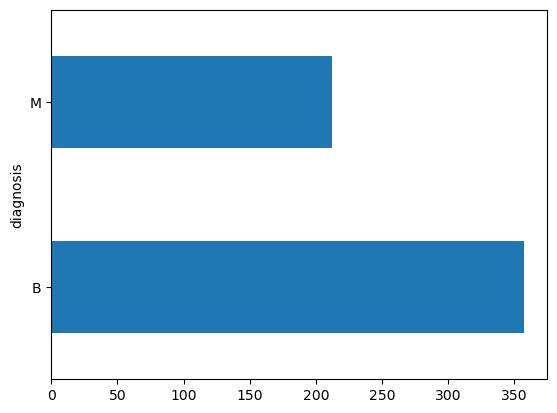

In [179]:
a.plot(kind='barh')

We can see that there are 2 classes under the diagnosis attribute: malignant and benign. Records marked malignant(M) indicate the existence of life-threatning breast cancer among surveyed patients while benign cases (B) are usually less dangerous and well defined. 

In this dataset, 62.7% of the records seems to be a benign case while the remaining are malignant. 

From the attributes information provided with the dataset, we know that 10 types of features were computed for each nuclei cell from the breast cancer biopsies. From this, the mean of all cells, standard error, and the worst (mean of the 3 largest values) were computed for each feature. 

# Dataset Description

In [180]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [181]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Initial analysis

To further analyze these features, we can check the distribution of each values for every feature within the dataset.

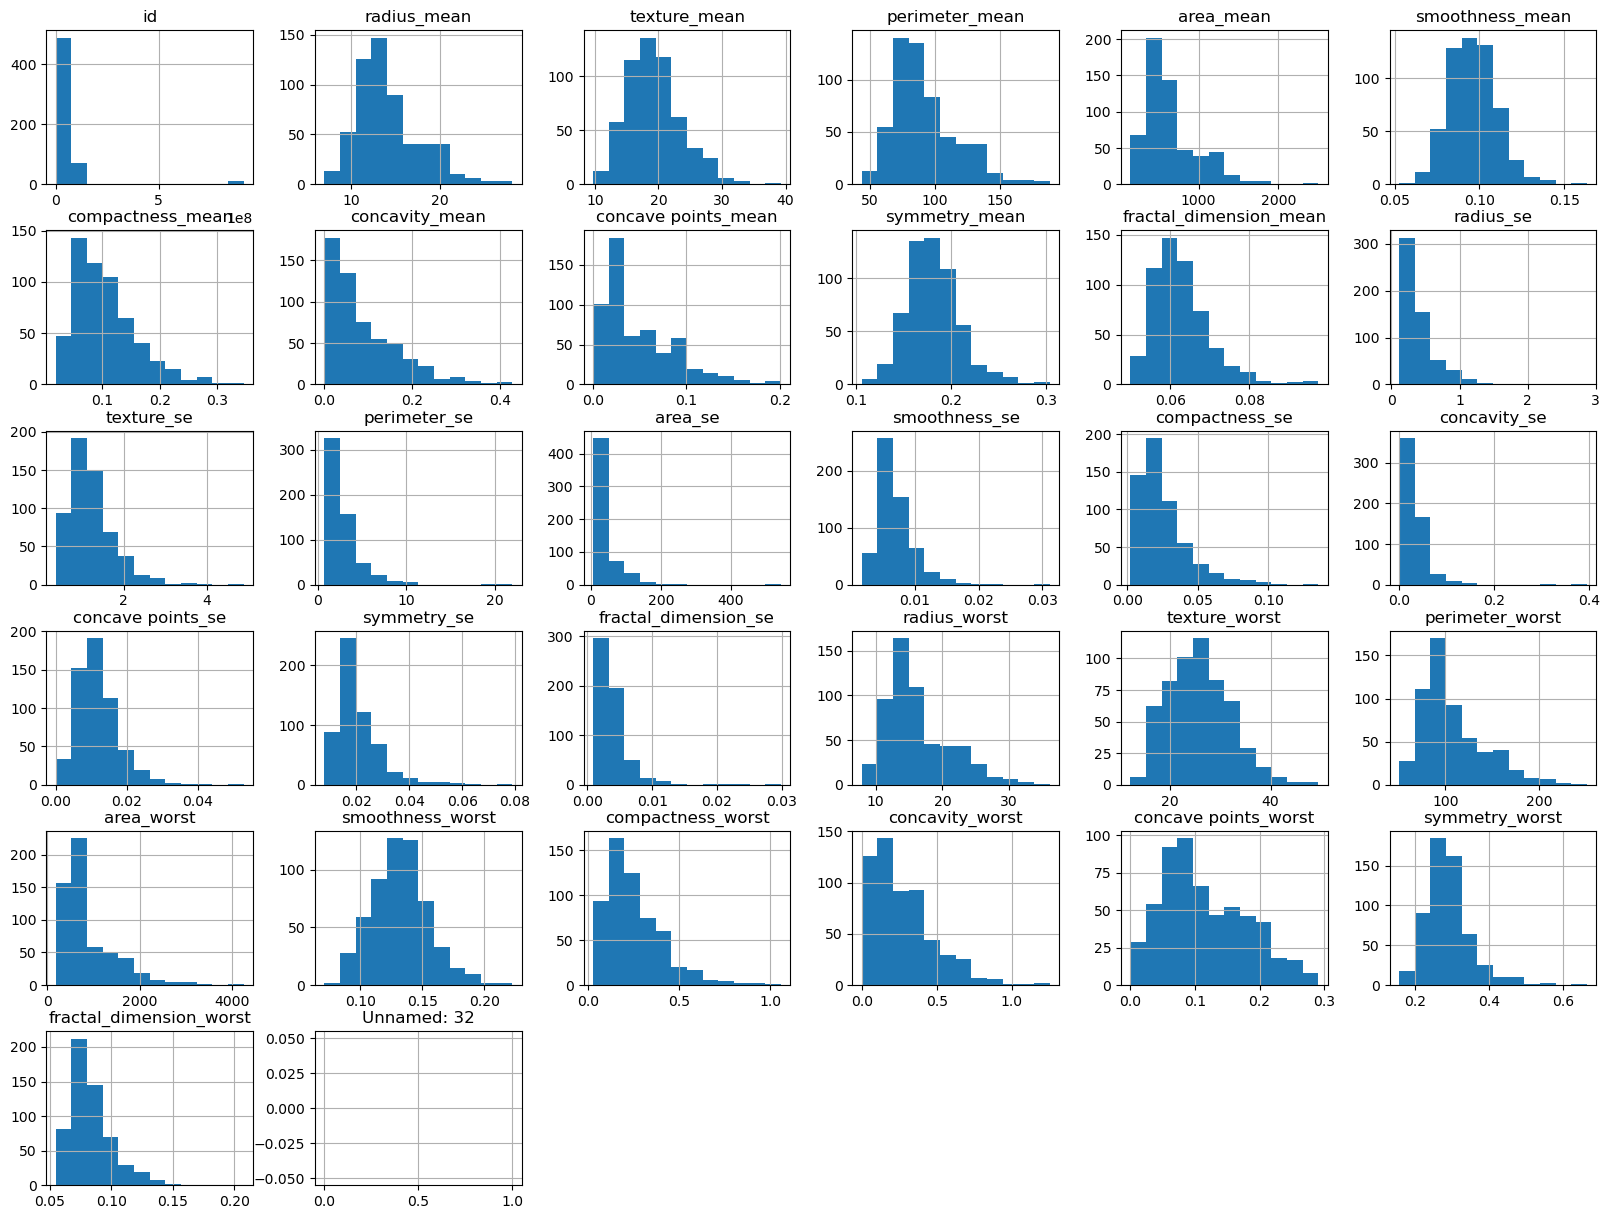

In [182]:
# Plot histograms for every feature
cancer_df.hist(bins=12, figsize=(20,15))
plt.show()

Some notable inferences that can be made from the observing the obtained distribution histograms are as follows:
* The distributions for most of the mean features tend to resemble their corresponding worst features. E.g. radius_mean and radius_worst. This seems like a result of how they were computed.
* A few attributes that do not seem to contribute to the data are found (e.g. Id and Unnamed: 32)

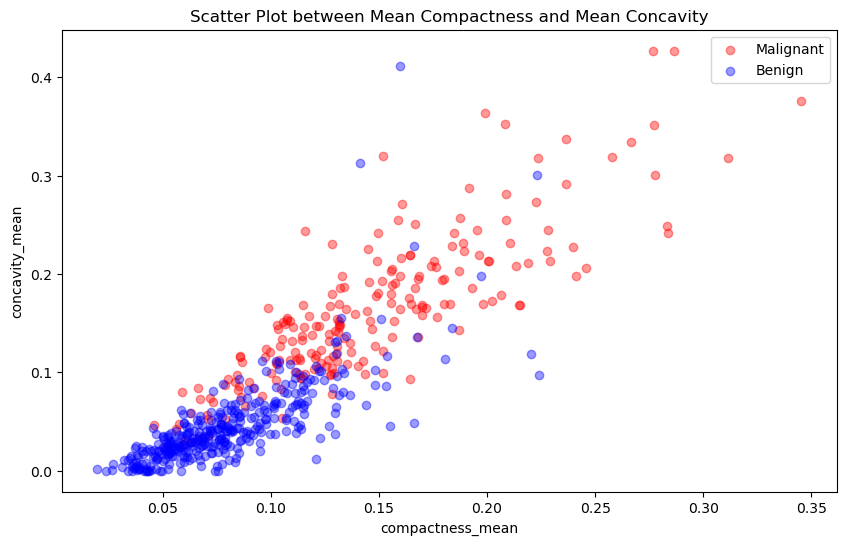

In [183]:
# We plot between Mean Compactness and Mean Concavity
plt.figure(figsize=(10, 6))
plt.scatter(cancer_df[cancer_df['diagnosis'] == 'M']['compactness_mean'], 
            cancer_df[cancer_df['diagnosis'] == 'M']['concavity_mean'], 
            color='red', label='Malignant', alpha=0.4)

plt.scatter(cancer_df[cancer_df['diagnosis'] == 'B']['compactness_mean'], 
            cancer_df[cancer_df['diagnosis'] == 'B']['concavity_mean'], 
            color='blue', label='Benign', alpha=0.4)

plt.title('Scatter Plot between Mean Compactness and Mean Concavity')
plt.xlabel('compactness_mean')
plt.ylabel('concavity_mean')
plt.legend()
plt.show()

Here we see that there is a positive correlation between the two selected features as well as clustering of the data points when differntiating them based on their class

# Preprocessing

In [184]:
# Checking for empty values
cancer_df.isnull().values.any() or cancer_df.isna().values.any()

True

In [185]:
cancer_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [186]:
# Dropping unnecessary columns
cancer_df.drop(columns=['id', 'Unnamed: 32'], inplace = True)

In [187]:
cancer_diagnosis = cancer_df['diagnosis']  
encoded_diagnosis = cancer_diagnosis.map({'M':1,'B':0})
cancer_features = cancer_df.drop(["diagnosis"], axis=1)
cancer_labels= ['M', 'B']

In [188]:
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(cancer_features)
scaled_features = pd.DataFrame(scaled_features, columns=cancer_features.columns)
scaled_features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


# Build a Gaussian Classifier

In [189]:
# Build a Gaussian Classifier
model_cancer_orig = GaussianNB()

# Getting training and testing dataset for dataset 1

In [190]:
x_train_cancer_orig, x_test_cancer_orig, y_train_cancer_orig, y_test_cancer_orig = train_test_split(
      cancer_features, encoded_diagnosis, random_state=0)

# Training the cancer model

In [191]:
model_cancer_orig.fit(x_train_cancer_orig, y_train_cancer_orig)

GaussianNB()

# Test the Cancer Model

In [192]:
# Model testing
y_pred_cancer_orig = model_cancer_orig.predict(x_test_cancer_orig)
#  returns the probabilities associated with each class
pred_prob_cancer_orig =  model_cancer_orig.predict_proba(x_test_cancer_orig)
pred_prob_cancer_orig.shape

(143, 2)

# Confusion Matrix for Cancer Dataset

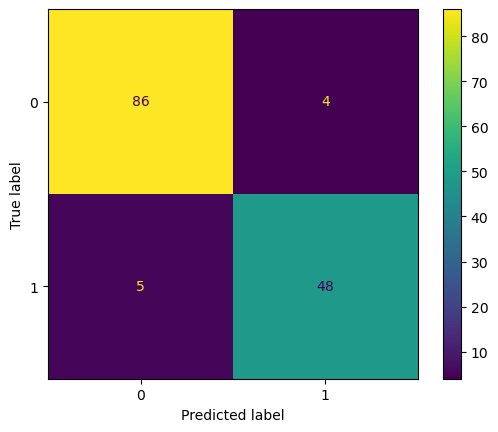

In [193]:
confusion_matrix_cancer_orig = confusion_matrix(y_test_cancer_orig, y_pred_cancer_orig, labels=[0,1])
plot_confusion_matrix(confusion_matrix_cancer_orig, [0,1]);

# Evaluation of the cancer model 

In [194]:
accuracy_cancer_orig,f1_cancer_orig,precision_cancer_orig,recall_cancer_orig = overall_model_eval(y_test_cancer_orig, y_pred_cancer_orig)

Accuracy: 0.9370629370629371
F1 Score: 0.9369370960531181
Precision: 0.9369092446015523
Recall: 0.9370629370629371


# Evaluating metrics against each category

In [195]:
TPR_cancer_orig, TNR_cancer_orig, PPV_cancer_orig, NPV_cancer_orig, FPR_cancer_orig, FNR_cancer_orig, FDR_cancer_orig, ACC_cancer_orig = each_cat_eval(confusion_matrix_cancer_orig)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.955556  0.905660   0.945055  0.923077  0.094340  0.044444  0.054945   
1  0.905660  0.955556   0.923077  0.945055  0.044444  0.094340  0.076923   

        ACC  
0  0.937063  
1  0.937063  


In [196]:
print(classification_report(y_test_cancer_orig, y_pred_cancer_orig, target_names=cancer_labels))

              precision    recall  f1-score   support

           M       0.95      0.96      0.95        90
           B       0.92      0.91      0.91        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



# Cross Validation using k_fold for cancer dataset

In [197]:
cross_validation_kfold(model_cancer_orig,x_train_cancer_orig,y_train_cancer_orig)

[0.93023256 0.97674419 0.93023256 0.95348837 0.97674419 0.90697674
 0.9047619  0.95238095 0.92857143 0.9047619 ]


In [198]:
pred_prob_cancer_orig= y_test_cancer_orig.values.ravel()


# ROC Curves for dataset

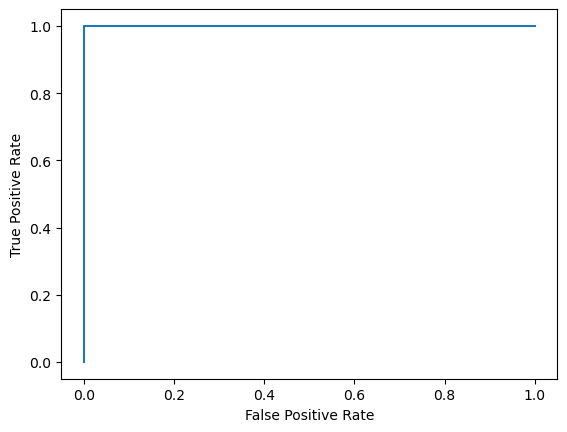

In [199]:
def plot_roc_curve(actual, pred_prob_arg):
    
    fpr, tpr, thresh = roc_curve(actual, pred_prob_arg)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
plot_roc_curve(y_test_cancer_orig, pred_prob_cancer_orig)

# Feature Selection

# Method 1: ANOVA (Analysis of Variance)

In [200]:
fs_cancer_1 = selectFTest(5, cancer_features, encoded_diagnosis, 2) # 10 features

In [201]:
print(fs_cancer_1.shape)
print(encoded_diagnosis.shape)

(569, 10)
(569,)


# Build a Gaussian Classifier

In [202]:
model_cancer_1 = GaussianNB()

# Getting training and testing dataset for dataset 1

In [203]:
x_train_cancer_1, x_test_cancer_1, y_train_cancer_1, y_test_cancer_1 = train_test_split(
      fs_cancer_1, encoded_diagnosis, random_state=0)

# Training the cancer model

In [204]:
model_cancer_1.fit(x_train_cancer_1, y_train_cancer_1)

GaussianNB()

# Test the Cancer Model

In [205]:
# Model testing
y_pred_cancer_1 = model_cancer_1.predict(x_test_cancer_1)
#  returns the probabilities associated with each class
pred_prob_cancer_1 =  model_cancer_1.predict_proba(x_test_cancer_1)

# Confusion Matrix 1 for Cancer Dataset

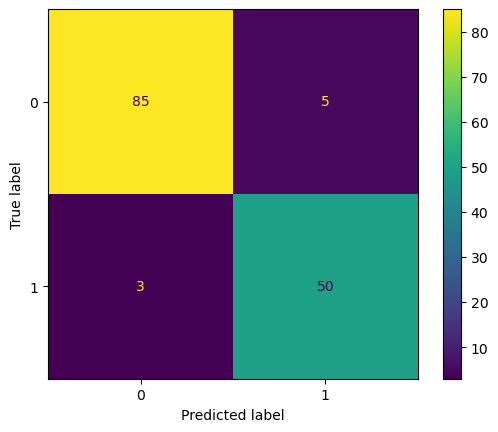

In [206]:
confusion_matrix_cancer_1 = confusion_matrix(y_test_cancer_1, y_pred_cancer_1, labels=[0,1])
plot_confusion_matrix(confusion_matrix_cancer_1, [0,1]);

# Evaluation of the cancer model 

In [207]:
accuracy_cancer_1,f1_cancer_1,precision_cancer_1,recall_cancer_1 = overall_model_eval(y_test_cancer_1, y_pred_cancer_1)

Accuracy: 0.9440559440559441
F1 Score: 0.9442596521248207
Precision: 0.9448506039415131
Recall: 0.9440559440559441


# Evaluating metrics against each category

In [208]:
TPR_cancer_1, TNR_cancer_1, PPV_cancer_1, NPV_cancer_1, FPR_cancer_1, FNR_cancer_1, FDR_cancer_1, ACC_cancer_1 = each_cat_eval(confusion_matrix_cancer_1)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.944444  0.943396   0.965909  0.909091  0.056604  0.055556  0.034091   
1  0.943396  0.944444   0.909091  0.965909  0.055556  0.056604  0.090909   

        ACC  
0  0.944056  
1  0.944056  


In [209]:
print(classification_report(y_test_cancer_1, y_pred_cancer_1, target_names=cancer_labels))

              precision    recall  f1-score   support

           M       0.97      0.94      0.96        90
           B       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



# Method 2: Wrapper (Recursive Feature Elimination)

In [210]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(cancer_features)
scaled_features = pd.DataFrame(scaled_features, columns=cancer_features.columns)

model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=5)
fs_cancer_2 = rfe.fit_transform(scaled_features, encoded_diagnosis)


# Build a Gaussian Classifier


In [211]:
model_cancer_2 = GaussianNB()

# Getting training and testing dataset for dataset 2

In [212]:
x_train_cancer_2, x_test_cancer_2, y_train_cancer_2, y_test_cancer_2 = train_test_split(
      fs_cancer_2, encoded_diagnosis, random_state=0)

# Training the cancer model

In [213]:
model_cancer_2.fit(x_train_cancer_2, y_train_cancer_2)

GaussianNB()

# Test the Cancer Model

In [214]:
# Model testing
y_pred_cancer_2 = model_cancer_2.predict(x_test_cancer_2)
#  returns the probabilities associated with each class
pred_prob_cancer_2 =  model_cancer_2.predict_proba(x_test_cancer_2)

# Confusion Matrix 1 for Cancer Dataset

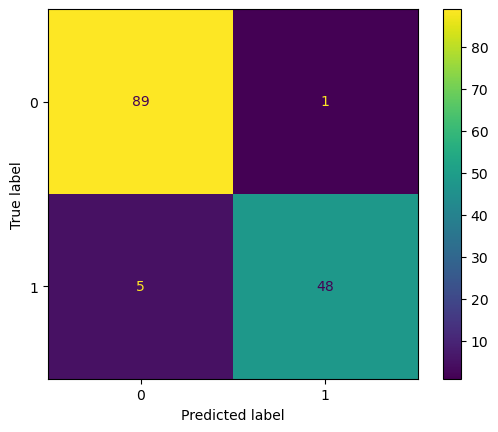

In [215]:
confusion_matrix_cancer_2 = confusion_matrix(y_test_cancer_2, y_pred_cancer_2, labels=[0,1])
plot_confusion_matrix(confusion_matrix_cancer_2, [0,1]);

# Evaluation of the cancer model 

In [216]:
accuracy_cancer_2,f1_cancer_2,precision_cancer_2,recall_cancer_2 = overall_model_eval(y_test_cancer_2, y_pred_cancer_2)

Accuracy: 0.958041958041958
F1 Score: 0.9576753170103555
Precision: 0.9589589741565424
Recall: 0.958041958041958


# Evaluating metrics against each category

In [217]:
TPR_cancer_2, TNR_cancer_2, PPV_cancer_2, NPV_cancer_2, FPR_cancer_2, FNR_cancer_2, FDR_cancer_2, ACC_cancer_2 = each_cat_eval(confusion_matrix_cancer_2)

Against each category
      Recall       TNR  Precision       NPV       FPR       FNR       FDR  \
0  0.988889  0.905660   0.946809  0.979592  0.094340  0.011111  0.053191   
1  0.905660  0.988889   0.979592  0.946809  0.011111  0.094340  0.020408   

        ACC  
0  0.958042  
1  0.958042  


In [218]:
print(classification_report(y_test_cancer_2, y_pred_cancer_2, target_names=cancer_labels))

              precision    recall  f1-score   support

           M       0.95      0.99      0.97        90
           B       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



# Conclusions 

# Method 1: ANOVA (Analysis of Variance)

Comparing cancer dataset against the feature dataset we get using method 1 (Analysis of Variance).

In [219]:
# Create a dataFrame using dictionary
conc_df_1=pd.DataFrame({"Accuracy":[accuracy_cancer_orig,accuracy_cancer_1],
                "F1 Score":[f1_cancer_orig,f1_cancer_1], "Precision":[precision_cancer_orig, precision_cancer_1],
                 "Recall":[recall_cancer_orig,recall_cancer_1]})
# Change the row indexes
conc_df_1.index = ['Original Dataset', 'Feature Dataset 1', ];
print(conc_df_1)

                   Accuracy  F1 Score  Precision    Recall
Original Dataset   0.937063  0.936937   0.936909  0.937063
Feature Dataset 1  0.944056  0.944260   0.944851  0.944056


# Method 2: Wrapper Method

In [220]:
# Create a dataFrame using dictionary
conc_df_2=pd.DataFrame({"Accuracy":[accuracy_cancer_orig,accuracy_cancer_2],
                "F1 Score":[f1_cancer_orig,f1_cancer_2], "Precision":[precision_cancer_orig, precision_cancer_2],
                 "Recall":[recall_cancer_orig,recall_cancer_2]})
# Change the row indexes
conc_df_2.index = ['Original Dataset', 'Feature Dataset 2', ];
print(conc_df_2)

                   Accuracy  F1 Score  Precision    Recall
Original Dataset   0.937063  0.936937   0.936909  0.937063
Feature Dataset 2  0.958042  0.957675   0.958959  0.958042


The accuracy measures the overall correctness of the prediction of the model, so among the three dataset we see that Feature Dataset 2  has the highest accuracy of 0.958042, followed by Feature Dataset 2 and Original Dataset. However, we see that all the 3 accuracies are high. This indicate that all models in all 3 datasets are performing well in making correct predictions.
We assume that this is probably due to low number of features present in the dataset making it easier to classify.

F1 score is the harmonic mean of precision and recall. On observing the F1 score for all 3 datasets,we see that Feature Dataset 2  has the highest F1 score of 0.957675, followed by Feature Dataset 2 and Original Dataset. However, we see that all the 3 F1 scores are high. From this we can draw a conclusion that Feature Dataset 2has slightly worse balance between precision and recall.

Precision is used to measure the model’s ability to correctly classify positive instances. When we look at the precision of all 3 datasets we see that Feature Dataset 3 has the highest precision of   0.958959, followed by Feature Dataset 2 and Original Dataset. This indicates that dataset 3 is better at avoiding false positives.

Recall is used to measure the model’s ability to identify all positive instances. When we look at the recall values, we see that the values are equal to their respective accuracy values. Therefore, we can draw similar conclusion that we made for accuracy i.e. that Feature Dataset 3 has the highest recall of 0.958042, followed by Feature Dataset 2 and Original Dataset. . Higher recall values suggest that the model is better at identifying positive instances while lower recall values indicate less effective in identifying positive instances.